[View in Colaboratory](https://colab.research.google.com/github/novamit/hello-world/blob/master/Facebook_Data_Sumit.ipynb)

**Analyze the Facebook data**

**Exploration ideas:**

**Date of birth analysis -** First identify the outliers and eliminate those users from dataset. Now divide the age in multiple buckets and analyze which age group is more active on facebook. Further, we need to analyze which age group have more male or female who are active on facebook.

**Friend count analysis -** First identify the outliers and the users who have no friends and eleminate from dataset. Now identify which age group has more friends. Further, we can analyze which age group of male or female have more friends. Also, identify which age group has 100+ friends.
Find out which age group has initiated more friend request and futher analyze among male and female.

**Tenure analysis -** Analyze the trend YoY of new users onboard and also analyze of trend YoY of new male and female users onboard.

**Like analysis -**



### **Upload and understanding of facebook data**

In [4]:
!pip install pandas-profiling

In [1]:
# Installing required packages to process data
!pip install -q xlrd

# import of all required functions
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# cloning facebook data from github profile
!git clone https://github.com/novamit/hello-world/

# Importing files from google colab
from google.colab import files

# Creation of Data frame fb using provided data as tsv file on facebook
facebook_data = pd.read_table('hello-world/pseudo_facebook.tsv',sep='\t')

# Display of data as dataframe
facebook_data.head()

Cloning into 'hello-world'...
remote: Counting objects: 23, done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 5), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (23/23), done.


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
!ls 

datalab  hello-world


In [6]:
import numpy as np
import pandas as pd
import pandas_profiling

/usr/local/lib/python2.7/dist-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/pytho

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import files
import io


In [8]:
uploaded = files.upload()
facebook_data = pd.read_table(io.StringIO(uploaded['pseudo_facebook.tsv'].decode('utf-8')))

KeyError: ignored

In [9]:
# Export the profile report

report = pandas_profiling.ProfileReport(facebook_data)
report.to_file('facebook_data.html')
files.download('facebook_data.html')

In [10]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [0]:
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [11]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


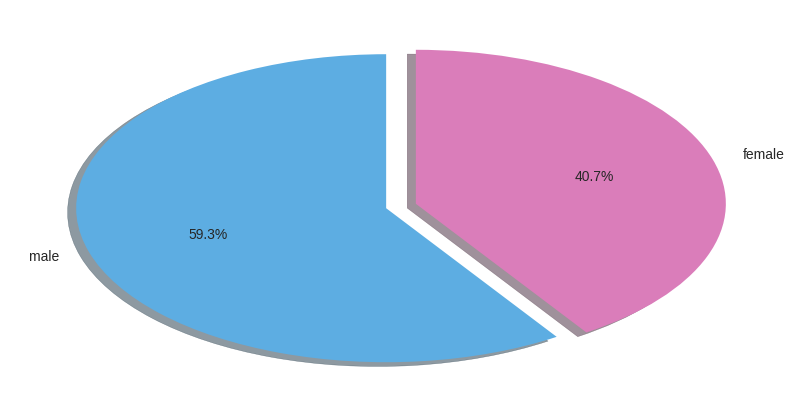

In [13]:
# Create pie chart to know which gender (male/female) is more on facebook

fig = plt.figure(figsize=(10,5))
labels = ['male', 'female']
sizes = facebook_data.gender.value_counts()
colors = ['#5DADE2', '#DA7DBA']
explode = (0.05, 0.05)

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### **Data Cleaning**

Filled missing values in gender (175 places around .17%) by mode of gender

Filled missing value in tenure (2 places around .002%) by mean of tenure

Removed outliers on the basis of age (max age was 113 which seems not valid)

Removed the users whose tenure is more than 30 days and they have no friends and even not doing any activities

In [0]:
# Gender is missing in 175 places of dataset that is .17% and these missing gender are replaced by mode of gender

facebook_data['gender'].fillna(facebook_data['gender'].mode()[0],inplace=True)

In [0]:
# Tenure is missing in only 2 places of dataset, i.e .002% and these missing tenure are replaced by mean of tenure

facebook_data['tenure'].fillna(facebook_data['tenure'].mean(),inplace=True)

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


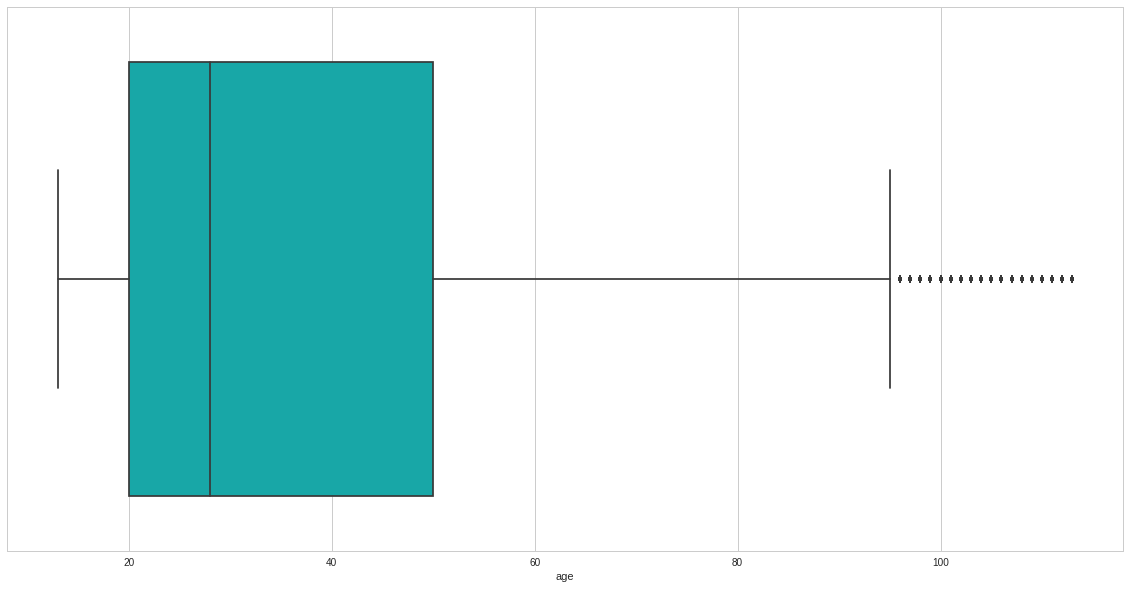

In [0]:
# Draw a boxplot to visualize outliers in respect of age

fig = plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.boxplot(x='age', data=facebook_data, color='c')
plt.show()

In [0]:
# Generic function to find outliers from any column

def detect_outliers(col):
  Q1 = np.percentile(facebook_data[col],25)
  Q3 = np.percentile(facebook_data[col],75)
  IQR = Q3 - Q1
  
  # outlier step
  outlier_step = 1.5 * IQR
  
  # Determine a list of indices of outliers for feature col
  outlier_list_col = facebook_data[(facebook_data[col] < Q1 - outlier_step) | (facebook_data[col] > Q3 + outlier_step )].index
  
  return outlier_list_col

In [0]:
# Remove the complete row where the age is outlier

outliers_to_drop = detect_outliers('age')
facebook_data_remout_age = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_age

In [0]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [0]:
# Remove the complete rows where the friend_count is 0 and the tenure is more than 30 days. These users will be treated not active user.

facebook_data_rem_friend_count_0 = facebook_data.drop(facebook_data.index[(facebook_data['friend_count'] == 0) & (facebook_data['tenure'] > 30)])
facebook_data = facebook_data_rem_friend_count_0

In [0]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
93242,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
93243,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
93244,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
93245,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
93246,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


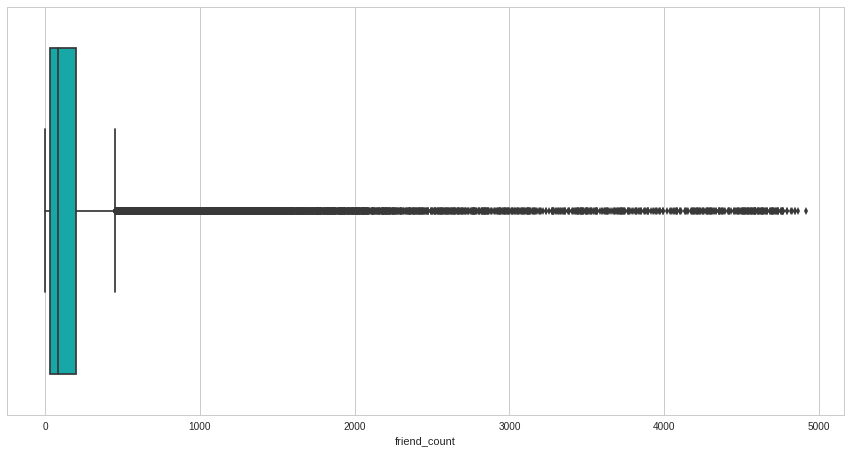

In [0]:
# Draw box plot to visualize outliers. Here in facebook the outliers are who have fake account to do likes.

fig = plt.figure(figsize=(15,7.5))
sns.set_style("whitegrid")
sns.boxplot(x='friend_count', data=facebook_data, color='c')
plt.show()

In [0]:
# Remove the complete rows where the friend_count is outlier

outliers_to_drop = detect_outliers('friend_count')
facebook_data_remout_friend_count = facebook_data.drop(facebook_data.index[outliers_to_drop])
facebook_data = facebook_data_remout_friend_count


In [0]:
# Reindexing the facebook data after removing rows

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

In [0]:
# Get info of facebook data after replacing the values

facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93247 entries, 0 to 93246
Data columns (total 15 columns):
userid                   93247 non-null int64
age                      93247 non-null int64
dob_day                  93247 non-null int64
dob_year                 93247 non-null int64
dob_month                93247 non-null int64
gender                   93247 non-null object
tenure                   93247 non-null float64
friend_count             93247 non-null int64
friendships_initiated    93247 non-null int64
likes                    93247 non-null int64
likes_received           93247 non-null int64
mobile_likes             93247 non-null int64
mobile_likes_received    93247 non-null int64
www_likes                93247 non-null int64
www_likes_received       93247 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 10.7+ MB


In [0]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.324700e+04,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000
mean,1.597521e+06,34.207095,14.551986,1978.792905,6.293489,514.929112,190.100818,105.258271,158.660804,145.329051,108.200478,85.477141,50.460261,59.851867
std,3.441881e+05,17.778191,8.990424,17.778191,3.519427,433.169960,376.069660,185.917144,581.483295,1424.893499,452.023862,859.432037,290.660399,618.799185
min,1.000008e+06,13.000000,1.000000,1918.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.299287e+06,20.000000,7.000000,1967.000000,3.000000,223.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.597007e+06,27.000000,14.000000,1986.000000,6.000000,403.000000,80.000000,45.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.896609e+06,46.000000,22.000000,1993.000000,9.000000,647.000000,199.000000,113.000000,82.000000,59.000000,47.000000,33.000000,6.000000,20.000000
max,2.193542e+06,95.000000,31.000000,2000.000000,12.000000,2697.000000,4917.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [0]:
# Use this cell when need to drop the column(s)

# facebook_data = facebook_data.drop(['friend_count_cat', 'age_group', 'active_user',	'gender_num',	'friend_count_cat_num',	'age_group_num', 'tenure_bin'], axis=1)

### **Date of birth analysis **

Visualize number of facebook users in different age group

Visualize number of facebook users genderwise in different age group


In [0]:
# Create a function to add a column 'age_group' in dataset

def age_group(row):
  if row['age'] < 20 :
     return '20'
  if row['age'] >=20 and row['age'] < 40 :
     return '40'
  if row['age'] >= 40 and row['age'] < 60 :
     return '60'
  if row['age'] >= 60 and row['age'] < 80:
     return '80'
  if row['age']  >= 80:
     return '99'
  
facebook_data['age_group'] = facebook_data.apply(lambda row: age_group(row),axis=1)


A new column with Age Group created using age column and dividing it in 5 equal age group range  of 20, 40, 60, 80 and 100 Yrs.

In [0]:
# Data after creation of Age Group column
facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
93242,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,80
93243,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,20
93244,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,20
93245,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,40
93246,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,40


AttributeError: ignored

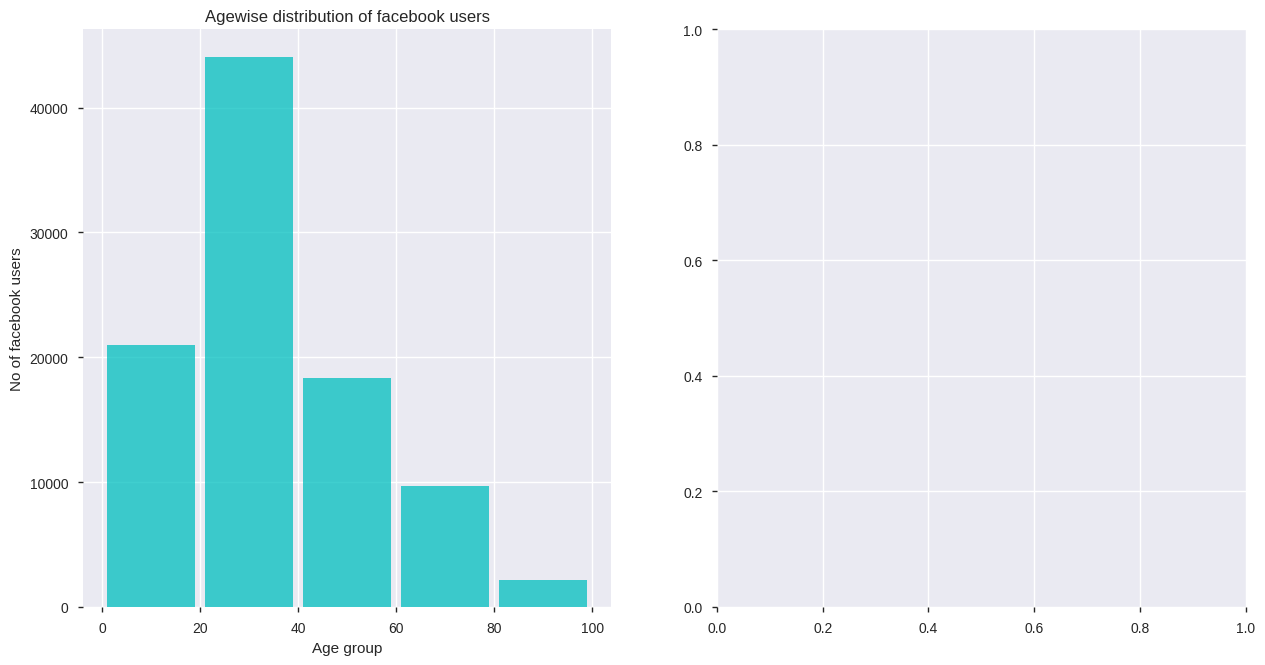

In [14]:
# Draw a histrogram and piechart to visualize which age group has more facebook users

fig = plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)

bin_edges = [0,20,40,60,80,100]
plt.hist(facebook_data['age'], bins=bin_edges, facecolor='c', alpha=0.75, rwidth=0.90)
plt.xlabel('Age group')
plt.ylabel('No of facebook users')
plt.title('Agewise distribution of facebook users')
plt.grid(True)


plt.subplot(1,2,2)

labels = ['20-40', '0-20', '40-60', '60-80', '80-100']
sizes = facebook_data.age_group.value_counts()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#cc99ff']

plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()

plt.show()


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


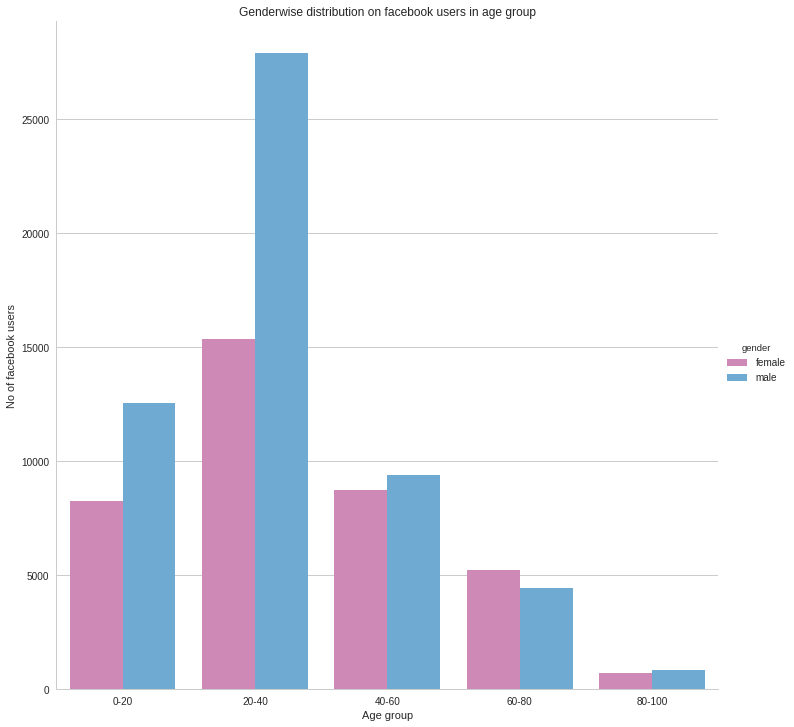

In [0]:
# Draw a factor plot to visualize genderwise facebook users in age group

pkmn_type_colors = ['#DA7DBA',  # WE
                    '#5DADE2',  # NA
                   ]

fig = plt.figure(figsize=(20,10))
colors = ['lightskyblue', 'pink']
sns.factorplot(x='age_group', hue='gender', data=facebook_data, kind='count', palette=pkmn_type_colors, size=10)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('No of facebook users')
plt.title('Genderwise distribution on facebook users in age group')
plt.show()

### **Friend count analysis**

Visualize total number of friends in different age group

Visualize average of total number of friends in different age group

Visualize total number of friends genderwise in different age group

Visualize average of total number of friends genderwise in different age group

Visulaize spread of friends count genderwise in different age group

Visualize average of total number of friendships initiated genderwise in each age group


In [0]:
# Describe column 'friend_count'

facebook_data['friend_count'].describe()

count    93247.000000
mean       190.100818
std        376.069660
min          0.000000
25%         31.000000
50%         80.000000
75%        199.000000
max       4917.000000
Name: friend_count, dtype: float64

Text(0.5,1,u'Distribution of the facebook users friend count wise')

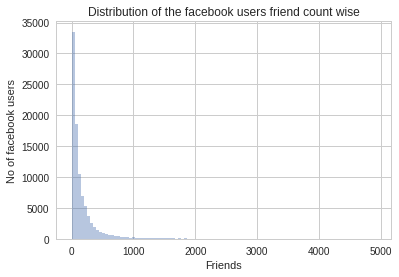

In [0]:
# Draw distribution plot to vizualize the data skewness

sns.distplot(facebook_data['friend_count'], bins=100, kde=False)
plt.xlabel('Friends')
plt.ylabel('No of facebook users')
plt.title('Distribution of the facebook users friend count wise')

           count      sum        mean  min   max
age_group                                       
20         20802  6896020  331.507547    0  4863
40         43212  7159036  165.672406    0  4845
60         18065  1942526  107.529809    0  4615
80          9631  1248104  129.592358    0  4917
99          1537   480645  312.716331    0  4759


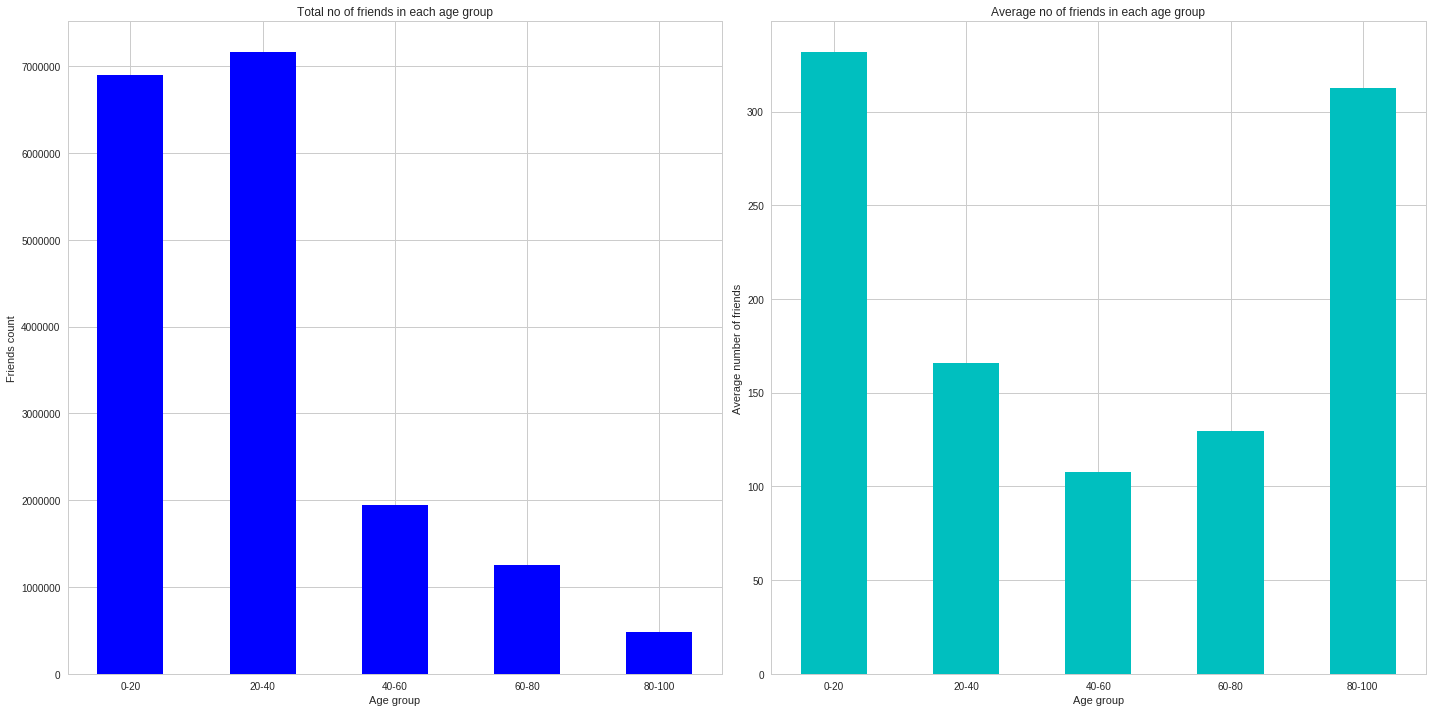

In [0]:
# Draw a bar plot to visualize number of friends and average number of friends in each age group

total_friends_count=facebook_data['friend_count'].groupby(facebook_data['age_group']).agg(['count', 'sum', 'mean', 'min', 'max'])
print(total_friends_count)

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.bar(total_friends_count.index, total_friends_count['sum'], color='b', width=0.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of friends in each age group')
plt.ylabel('Friends count')
plt.xlabel('Age group')

plt.subplot(1,2,2)
plt.bar(total_friends_count.index, total_friends_count['mean'], color='c', width=0.5)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Average no of friends in each age group')
plt.ylabel('Average number of friends')
plt.xlabel('Age group')

plt.tight_layout()
plt.show()

In [0]:
# Reset index of total_friends_count used for group by 1 column

total_friends_count.reset_index()

,age_group,count,sum,mean,min,max
0,20,20802,6896020,331.507547,0,4863
1,40,43212,7159036,165.672406,0,4845
2,60,18065,1942526,107.529809,0,4615
3,80,9631,1248104,129.592358,0,4917
4,99,1537,480645,312.716331,0,4759


age_group  gender
20         female    4017807
           male      2878213
40         female    3127699
           male      4031337
60         female    1051756
           male       890770
80         female     639023
           male       609081
99         female     203486
           male       277159
Name: friend_count, dtype: int64


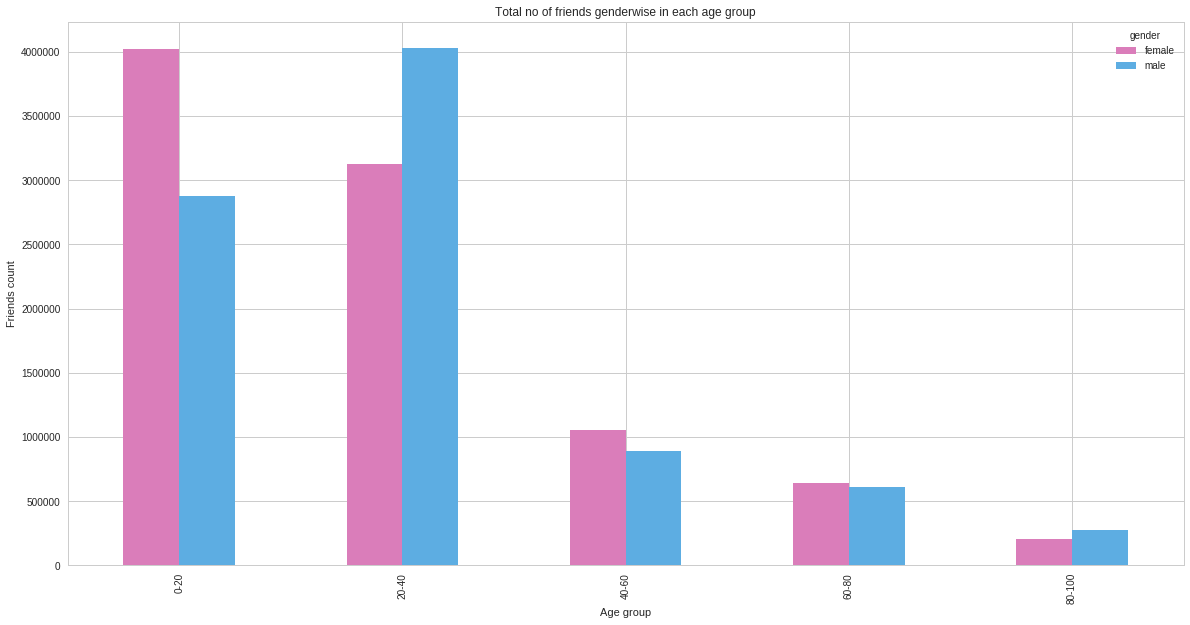

In [0]:
# Plot the graph to visualize total number of friends genderwise in each age group

total_friends_count1=facebook_data['friend_count'].groupby([facebook_data['age_group'],facebook_data['gender']]).sum()
print (total_friends_count1)

newcolors = ['#DA7DBA','#5DADE2']

total_friends_count1.unstack('gender').plot(kind='bar', subplots=False, color=newcolors, figsize=(20,10))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Total no of friends genderwise in each age group')
plt.ylabel('Friends count')
plt.xlabel('Age group')
plt.show()

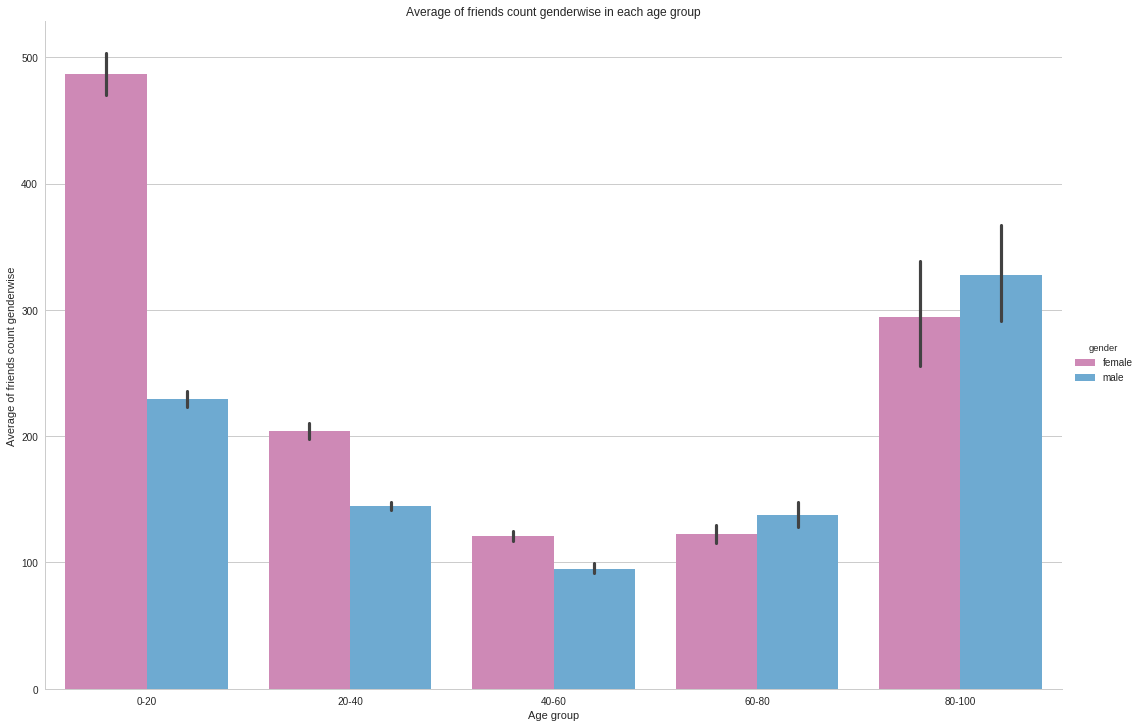

In [0]:
# Plot a graph to visualize average friend count genderwise in different age group

sns.factorplot(x="age_group", y="friend_count", data=facebook_data, kind="bar", hue='gender', aspect=1.5, palette=pkmn_type_colors, size=10)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Average of friends count genderwise')
plt.title('Average of friends count genderwise in each age group')
plt.show()

In [0]:
# Reset index of total_friends_count1 used for group by 2 columns

total_friends_count1.reset_index()

,age_group,gender,friend_count
0,20,female,4017807
1,20,male,2878213
2,40,female,3127699
3,40,male,4031337
4,60,female,1051756
5,60,male,890770
6,80,female,639023
7,80,male,609081
8,99,female,203486
9,99,male,277159


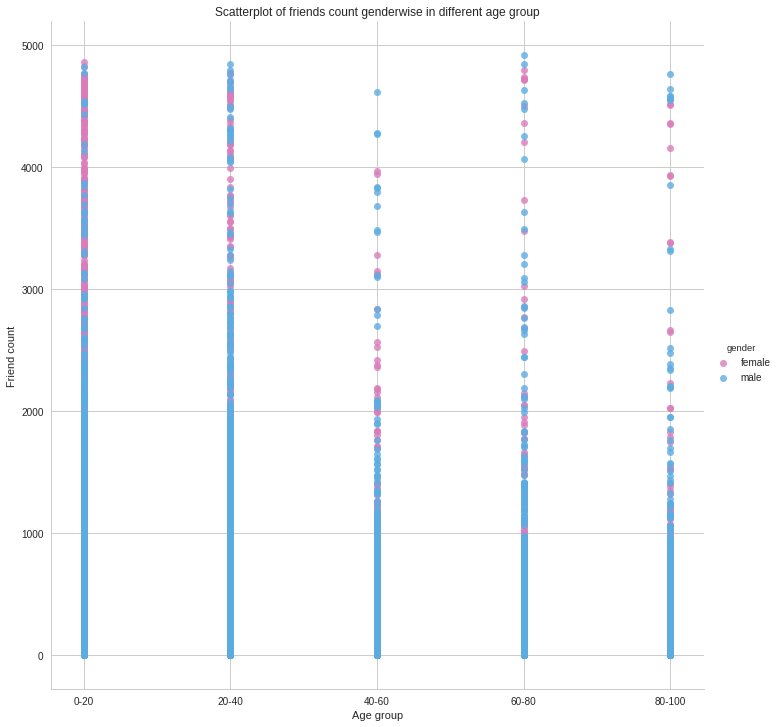

In [0]:
# Scatterplot of friends count genderwise in different age group 

sns.lmplot('age_group', 'friend_count', data=facebook_data, fit_reg=False, hue="gender",  palette=pkmn_type_colors, size=10)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Friend count')
plt.title('Scatterplot of friends count genderwise in different age group')
plt.show()

In [0]:
# Describe the column 'friendships_initiated'

facebook_data['friendships_initiated'].describe()

count    93247.000000
mean       105.258271
std        185.917144
min          0.000000
25%         17.000000
50%         45.000000
75%        113.000000
max       4144.000000
Name: friendships_initiated, dtype: float64

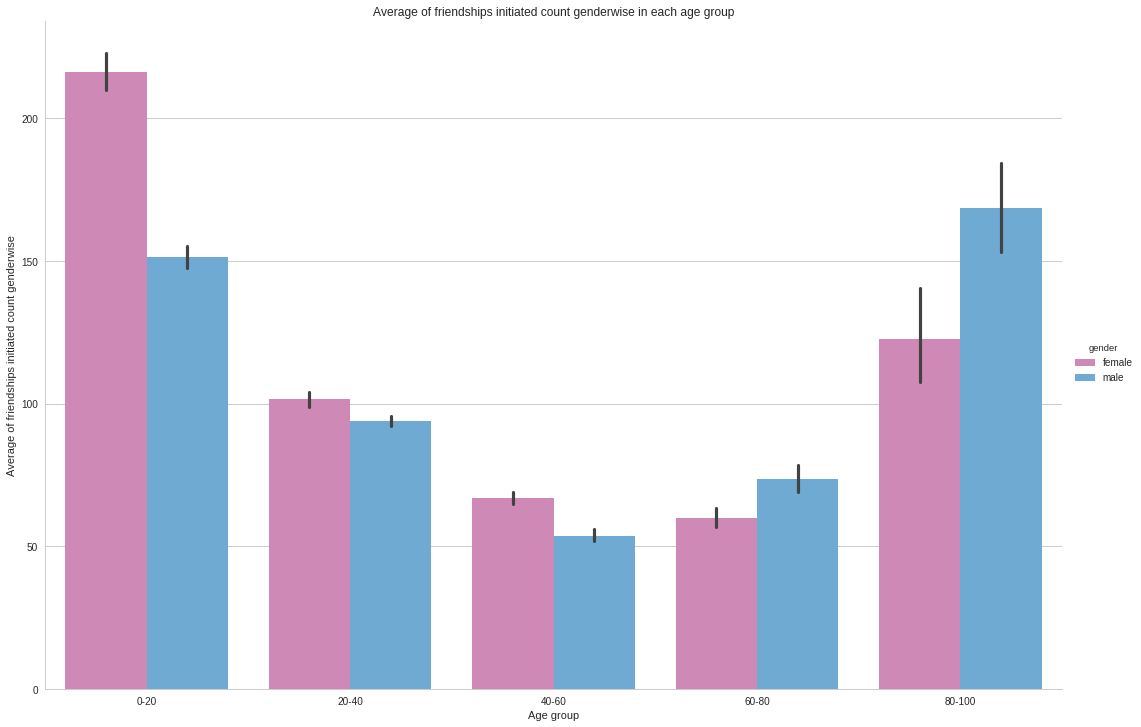

In [0]:
# Plot a graph to visualize average friendship initiated genderwise in different age group

sns.factorplot(x="age_group", y="friendships_initiated", data=facebook_data, kind="bar", hue='gender', aspect=1.5, palette=pkmn_type_colors, size=10)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.xlabel('Age group')
plt.ylabel('Average of friendships initiated count genderwise')
plt.title('Average of friendships initiated count genderwise in each age group')
plt.show()

### **Tenure analysis**

Visualize the number of users on board in past years

Visualize the number of users genderwise on board in past years

In [0]:
facebook_data.tenure.describe()

count    93247.000000
mean       514.929112
std        433.169960
min          0.000000
25%        223.000000
50%        403.000000
75%        647.000000
max       2697.000000
Name: tenure, dtype: float64

In [0]:
# Analysis of trend YoY - How many new male and female users onboard

def tenure_bin(row):
  if row['tenure'] <= 365 :
     return '10'
  if row['tenure'] > 365 and row['tenure'] <= 730 :
     return '20'
  if row['tenure'] > 730 and row['tenure'] <= 1095 :
     return '30'
  if row['tenure'] > 1095 and row['tenure'] <= 1460 :
     return '40'
  if row['tenure'] > 1460 and row['tenure'] <= 1825 :
     return '50'
  if row['tenure'] > 1825 and row['tenure'] <= 2190 :
     return '60'
  if row['tenure'] > 2190 and row['tenure'] <= 2555 :
     return '70'
  if row['tenure'] > 2555:
     return '80'
  
facebook_data['tenure_bin'] = facebook_data.apply(lambda row: tenure_bin(row),axis=1)

In [0]:
# reset index after adding new column

facebook_data.reset_index(drop=True, inplace=True)
facebook_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,tenure_bin
93242,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,80,20
93243,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,20,10
93244,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,20,10
93245,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,40,20
93246,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,40,20


            count           sum         mean     min     max
tenure_bin                                                  
10          42049  8.228554e+06   195.689648     0.0   365.0
20          32383  1.677845e+07   518.125247   366.0   730.0
30           8923  7.849786e+06   879.724980   731.0  1095.0
40           4562  5.813952e+06  1274.430513  1096.0  1460.0
50           3767  6.136444e+06  1629.000265  1461.0  1825.0
60           1150  2.260674e+06  1965.803478  1826.0  2190.0
70            407  9.320530e+05  2290.056511  2191.0  2550.0
80              6  1.568200e+04  2613.666667  2577.0  2697.0


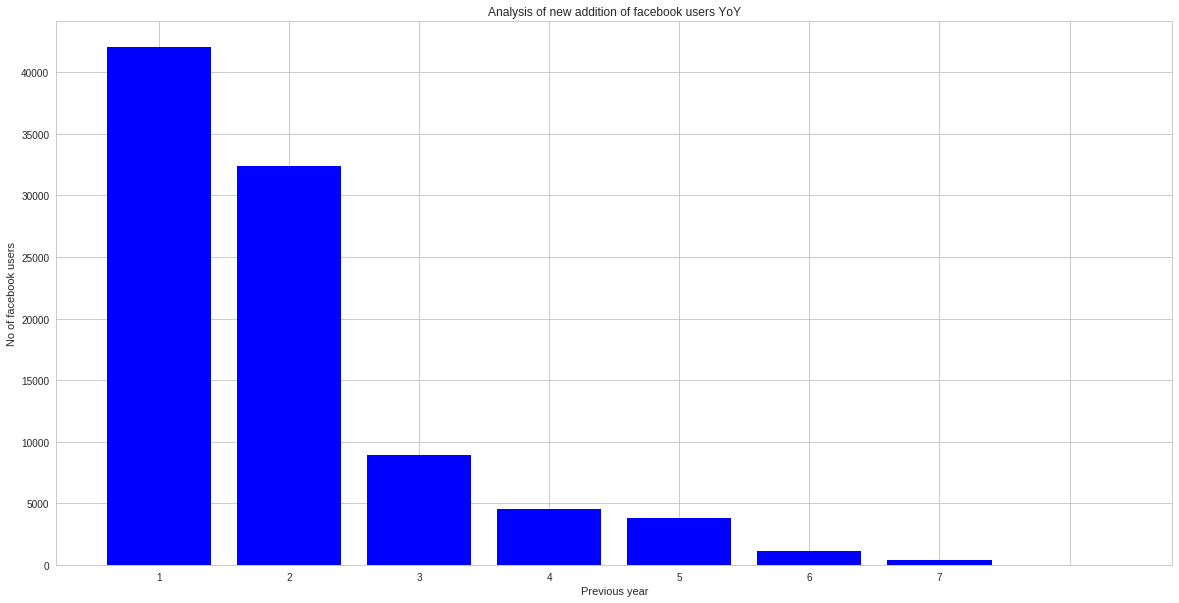

In [0]:
# Analysis of trend YoY - New users onboard

total_user_count=facebook_data['tenure'].groupby(facebook_data['tenure_bin']).agg(['count', 'sum', 'mean', 'min', 'max'])
print(total_user_count)

fig = plt.figure(figsize=(20,10))
plt.bar(total_user_count.index, total_user_count['count'], color='b')
locs, title = plt.xticks()
plt.xticks(locs,('1','2','3','4','5','6','7'))
plt.title('Analysis of new addition of facebook users YoY')
plt.ylabel('No of facebook users')
plt.xlabel('Previous year')
plt.show()

In [0]:
# reset index after doing groupby

total_user_count.reset_index(drop=True, inplace=True)
total_user_count.tail()

,count,sum,mean,min,max
3,4562,5813952.0,1274.430513,1096.0,1460.0
4,3767,6136444.0,1629.000265,1461.0,1825.0
5,1150,2260674.0,1965.803478,1826.0,2190.0
6,407,932053.0,2290.056511,2191.0,2550.0
7,6,15682.0,2613.666667,2577.0,2697.0


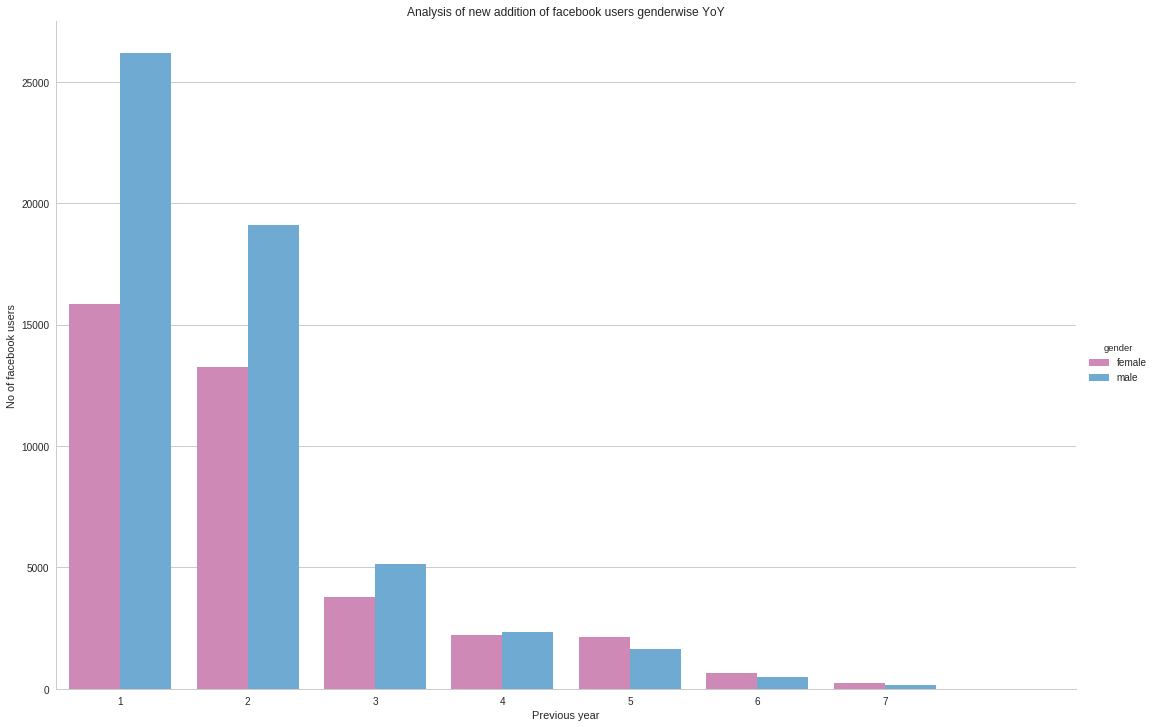

In [0]:
fig = plt.figure(figsize=(20,10))
sns.factorplot(x='tenure_bin', hue='gender', data=facebook_data, kind='count', size=10, aspect=1.5, palette=pkmn_type_colors)
locs, title = plt.xticks()
plt.xticks(locs,('1','2','3','4','5','6','7'))
plt.title('Analysis of new addition of facebook users genderwise YoY')
plt.ylabel('No of facebook users')
plt.xlabel('Previous year')
plt.show()

### **Likes analysis**

Visualize the likes including mobile likes and www likes in different age group

Visulaize the likes genderwise including mobile likes and www likes in different age group

Visulaize the number of users who have more likes on mobile than www in different age group

Visualize the number of users genderwise who have more likes on mobile than www in different age group

Visualize the likes received including mobile likes received and www likes received in different age group

Visulaize the likes received genderwise including mobile likes received and www likes received in different age group

Visulaize the number of users who have more likes received on mobile than www in different age group

Visualize the number of users genderwise who have more likes received on mobile than www in different age group

In [0]:
facebook_data[['likes',	'likes_received',	'mobile_likes',	'mobile_likes_received',	'www_likes',	'www_likes_received']].describe()

,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000,93247.000000
mean,158.660804,145.329051,108.200478,85.477141,50.460261,59.851867
std,581.483295,1424.893499,452.023862,859.432037,290.660399,618.799185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,82.000000,59.000000,47.000000,33.000000,6.000000,20.000000
max,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


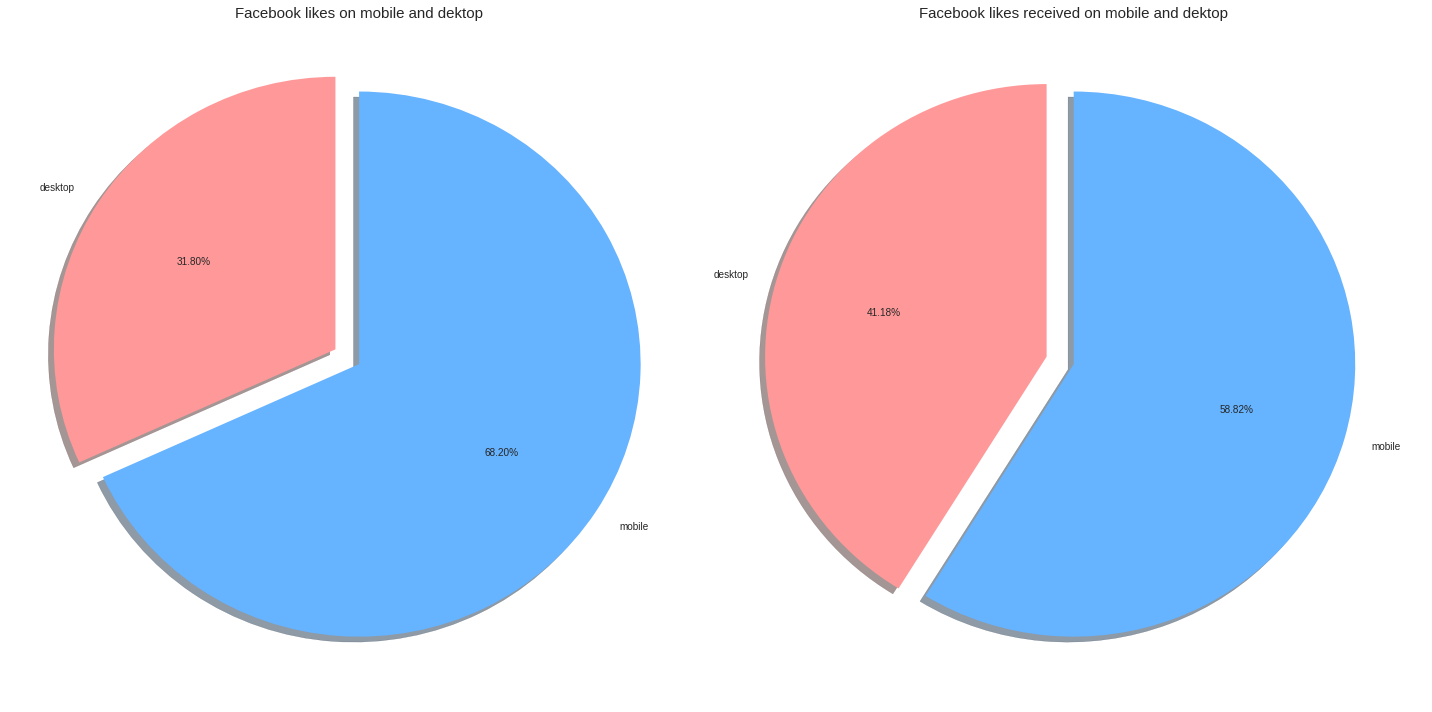

In [0]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,1)

values=[facebook_data.www_likes.sum(), facebook_data.mobile_likes.sum()]
labels=['desktop','mobile']
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode)
plt.title('Facebook likes on mobile and dektop', fontsize=15)

plt.subplot(1,2,2)

values=[facebook_data.www_likes_received.sum(), facebook_data.mobile_likes_received.sum()]
labels=['desktop','mobile']
explode = (0.1, 0)
colors = ['#ff9999','#66b3ff']
plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90, explode=explode)
plt.title('Facebook likes received on mobile and dektop',fontsize=15)

plt.tight_layout()
plt.show()

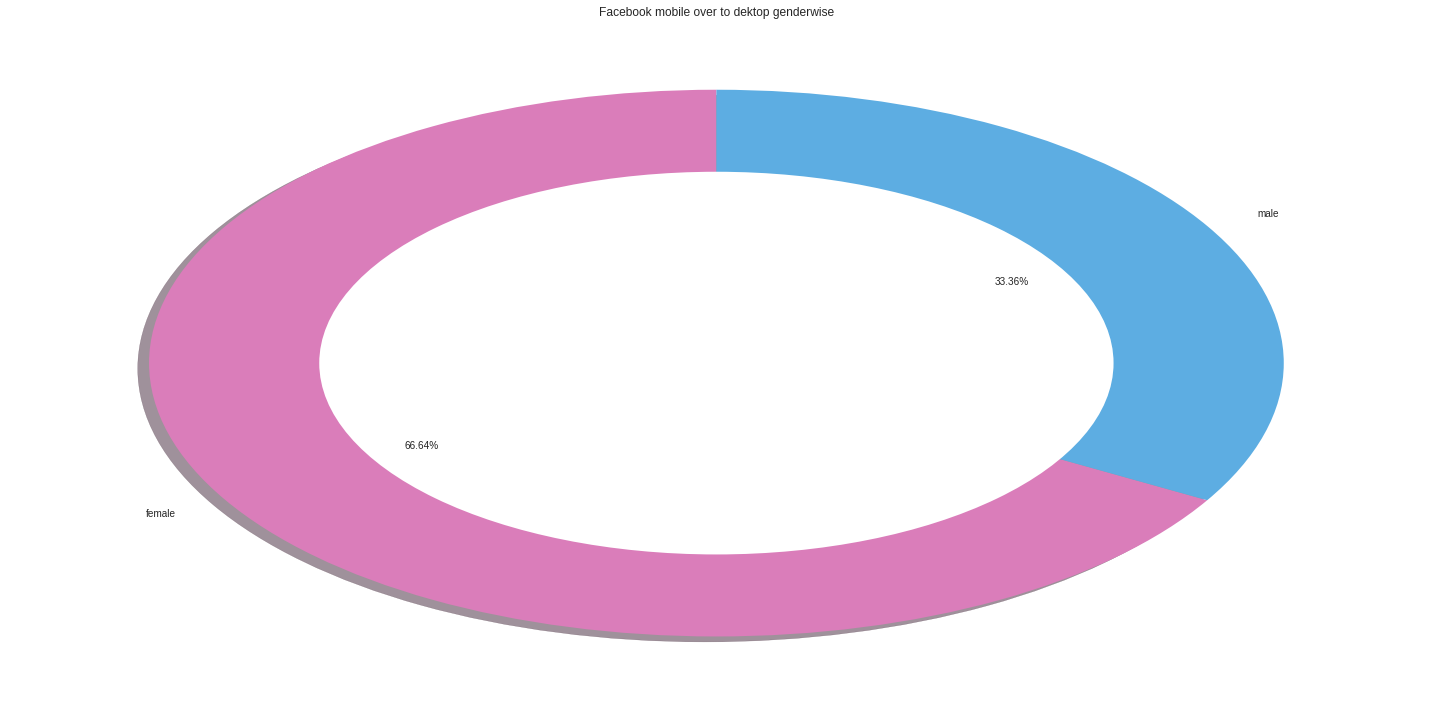

In [0]:

m_over_d_likes = facebook_data[(facebook_data['mobile_likes'] >= facebook_data['www_likes'])].groupby(['gender'])['mobile_likes'].sum()

fig = plt.figure(figsize=(20,10))
colors = ['#DA7DBA', '#5DADE2']
explode = (0.2, 0)

plt.pie(m_over_d_likes, labels=m_over_d_likes.index, autopct='%1.2f%%', shadow=True, colors=colors, startangle=90)
plt.title('Facebook mobile over to dektop genderwise')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

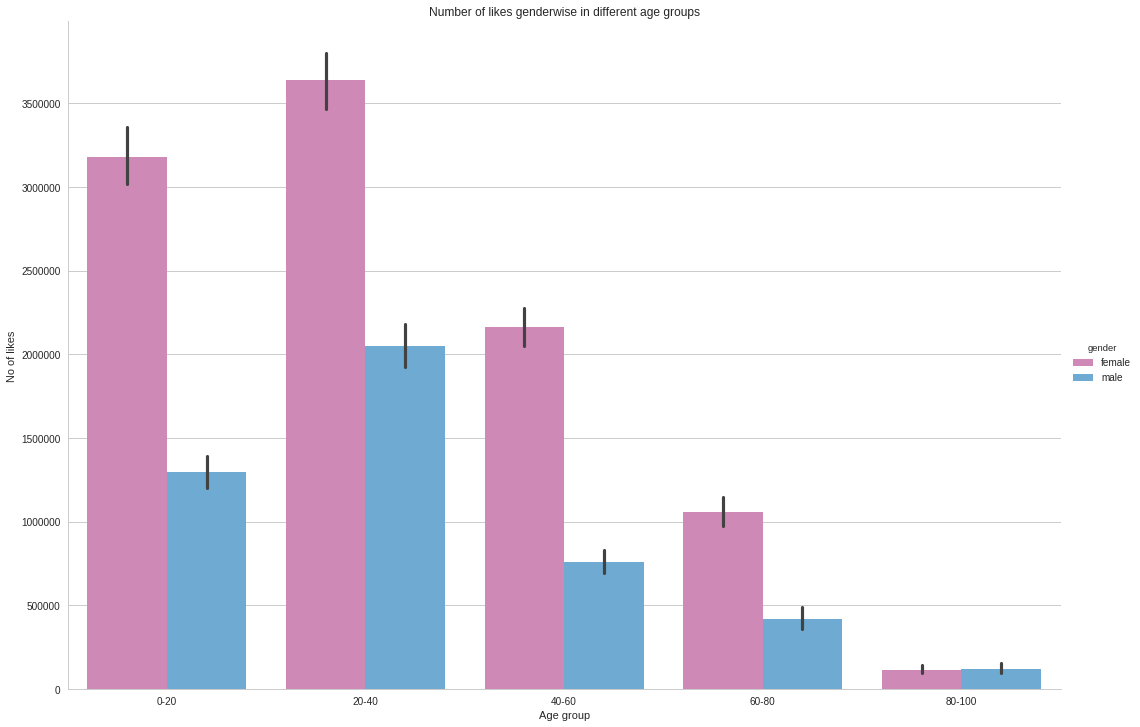

In [0]:
sns.factorplot(x='age_group', y='likes', kind='bar', estimator=sum, data=facebook_data, hue='gender', size=10, aspect=1.5, palette=pkmn_type_colors)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title("Number of likes genderwise in different age groups")
plt.ylabel('No of likes')
plt.xlabel('Age group')
plt.show()

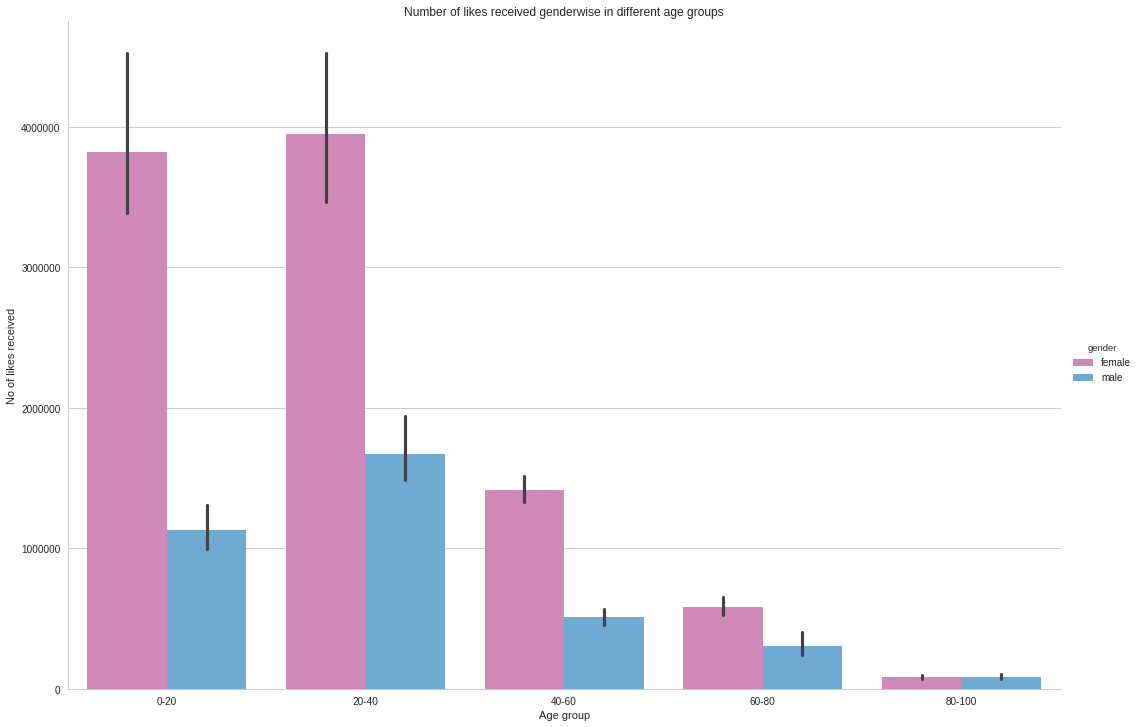

In [0]:
sns.factorplot(x='age_group', y='likes_received', kind='bar', estimator=sum, data=facebook_data, hue='gender', size=10, aspect=1.5, palette=pkmn_type_colors)
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
plt.title('Number of likes received genderwise in different age groups')
plt.ylabel('No of likes received')
plt.xlabel('Age group')
plt.show()

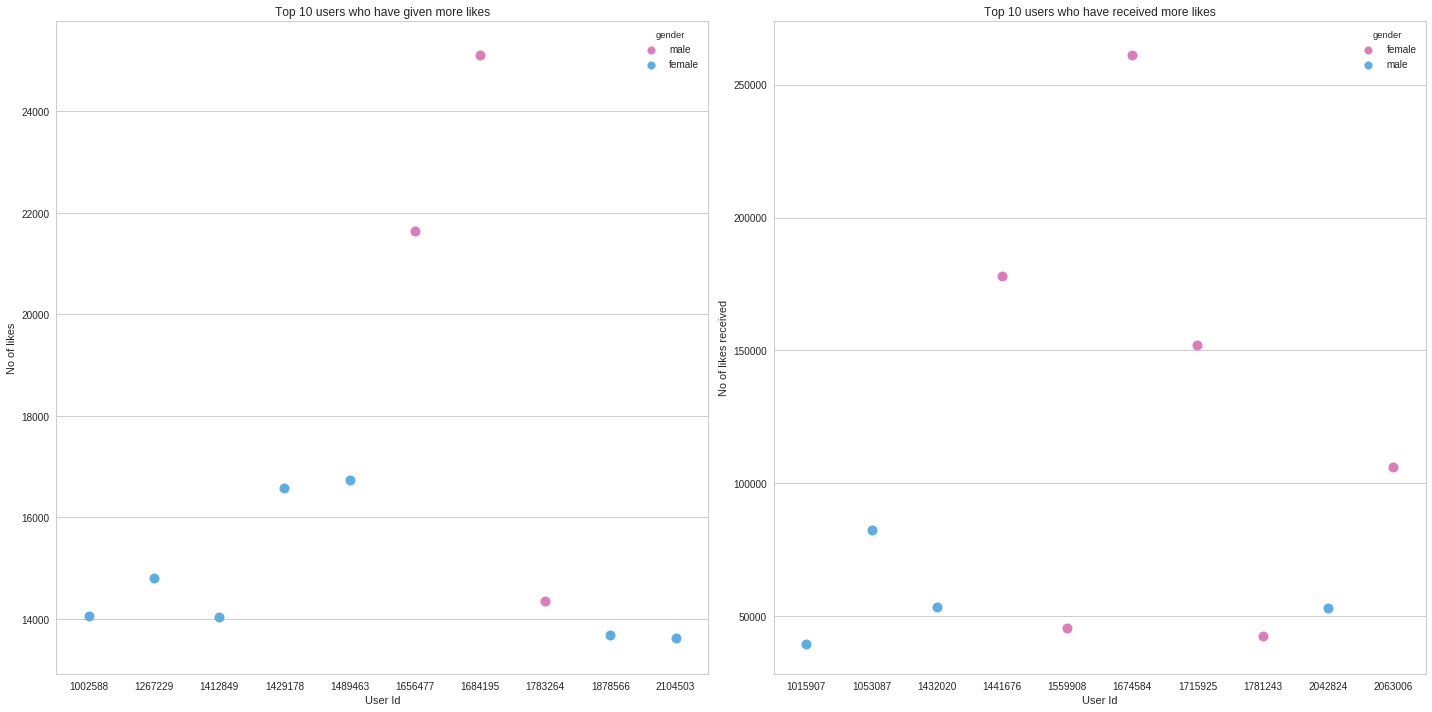

In [0]:
top10_likes = pd.DataFrame(facebook_data.sort_values(['likes'], ascending=False).head(10))
top10_likes_received = pd.DataFrame(facebook_data.sort_values(['likes_received'],ascending=False).head(10))

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.swarmplot(x='userid', y='likes', hue='gender', data=top10_likes, size=10, palette=pkmn_type_colors)
plt.title("Top 10 users who have given more likes")
plt.ylabel('No of likes')
plt.xlabel('User Id')

plt.subplot(1,2,2)
sns.swarmplot(x='userid', y='likes_received', hue='gender', data=top10_likes_received, size=10, palette=pkmn_type_colors)
plt.title("Top 10 users who have received more likes")
plt.ylabel('No of likes received')
plt.xlabel('User Id')

plt.tight_layout()
plt.show()

14794644
4705268
10089370
             likes  www_likes  mobile_likes
age_group                                  
20         4476286    1487766       2988519
40         5689527    1385068       4304456
60         2919898    1014170       1905726
80         1474737     733223        741514
99          234196      85041        149155


([<matplotlib.axis.XTick at 0x7f91767187d0>,
 <a list of 5 Text xticklabel objects>)

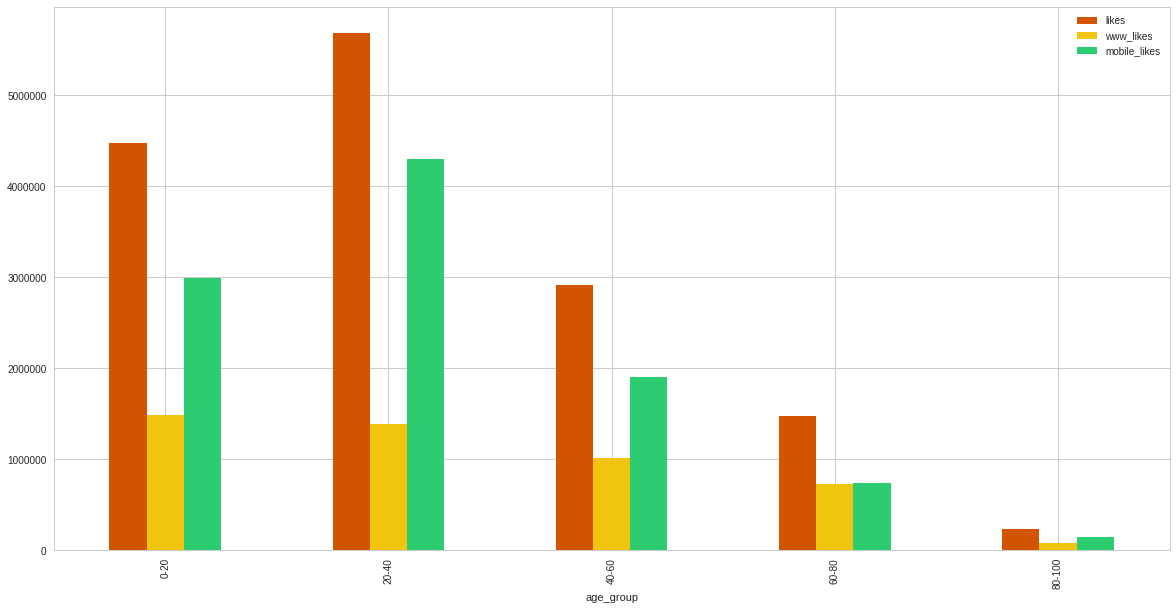

In [0]:
# Plot the graph to visualize total number of friends genderwise in each age group

print(facebook_data['likes'].sum())
print(facebook_data['www_likes'].sum())
print(facebook_data['mobile_likes'].sum())

like_analysis = facebook_data[['likes','www_likes','mobile_likes']].groupby(facebook_data['age_group']).sum()
print (like_analysis)

newcolors = ['#D35400','#F1C40F','#2ECC71']

like_analysis.plot(kind='bar', subplots=False, color=newcolors, figsize=(20,10))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
#plt.title('Total no of friends genderwise in each age group')
#plt.ylabel('Friends count')
#plt.xlabel('Age group')
#plt.show()

In [0]:
# Reset index of total_friends_count used for group by 1 column

total_friends_count.reset_index()

,age_group,count,sum,mean,min,max
0,20,20802,6896020,331.507547,0,4863
1,40,43212,7159036,165.672406,0,4845
2,60,18065,1942526,107.529809,0,4615
3,80,9631,1248104,129.592358,0,4917
4,99,1537,480645,312.716331,0,4759


14794644
4705268
10089370
                    likes  www_likes  mobile_likes
age_group gender                                  
20        female  3181613    1085173       2096439
          male    1294673     402593        892080
40        female  3639208     935722       2703485
          male    2050319     449346       1600971
60        female  2160519     795019       1365498
          male     759379     219151        540228
80        female  1056151     526825        529326
          male     418586     206398        212188
99        female   115153      38759         76394
          male     119043      46282         72761


([<matplotlib.axis.XTick at 0x7f9176558ad0>,
 <a list of 5 Text xticklabel objects>)

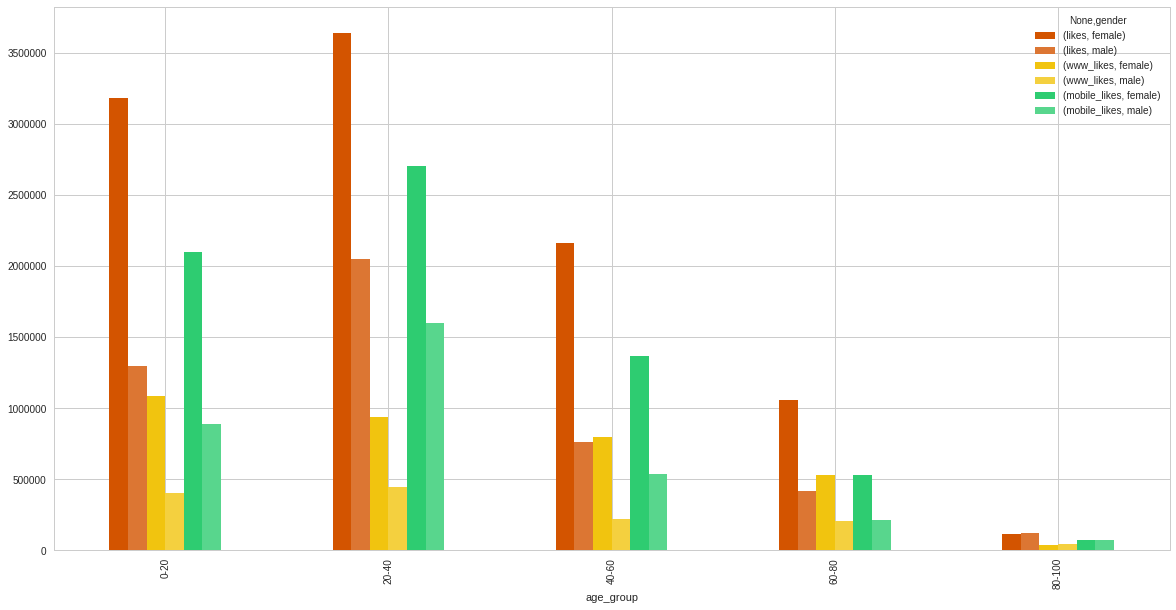

In [0]:
# Plot the graph to visualize total number of friends genderwise in each age group

print(facebook_data['likes'].sum())
print(facebook_data['www_likes'].sum())
print(facebook_data['mobile_likes'].sum())

like_analysis = facebook_data[['likes','www_likes','mobile_likes']].groupby([facebook_data['age_group'],facebook_data['gender']]).sum()
print (like_analysis)

newcolors = ['#D35400','#DC7633','#F1C40F','#F4D03F','#2ECC71','#58D68D']

like_analysis.unstack('gender').plot(kind='bar', subplots=False, color=newcolors, figsize=(20,10))
locs, title = plt.xticks()
plt.xticks(locs,('0-20','20-40','40-60','60-80','80-100'))
#plt.title('Total no of friends genderwise in each age group')
#plt.ylabel('Friends count')
#plt.xlabel('Age group')
#plt.show()